In [1]:
#Importing necessary libraries
import json, sys, random
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

Using TensorFlow backend.


In [3]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
#Reading the data
f = open(r'D:/MSU/Material/Fall/ML and Optimization/Project/shipsnet.json')
dataset = json.load(f)
f.close()

In [5]:
#Inspect dictionary keys
dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [6]:
#Partition input and output
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

print(input_data.shape)
print(output_data.shape)

(4000, 19200)
(4000,)


In [7]:
#Each image is represented by 80 x 80 x 3 (RGB)

rgb = 3
width = 80
height = 80

#Reshaping the input data 
X = input_data.reshape([-1, rgb, width, height])

In [8]:
#Shape of input data
X.shape

(4000, 3, 80, 80)

In [9]:
#Inspect one image
pic = X[0]

red = pic[0]
green = pic[1]
blue = pic[2]

1


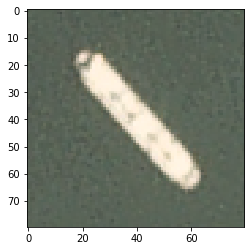

In [10]:
#Image
plt.imshow(pic.transpose([1,2,0]))

#Is it a ship or not
print(output_data[0])

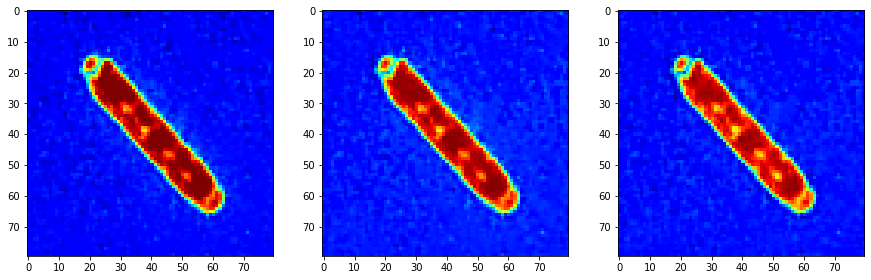

In [11]:
#Plotting each color map for first picture
plt.figure(figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(red)

plt.subplot(1, 3, 2)
plt.imshow(green)

plt.subplot(1, 3, 3)
plt.imshow(blue)
    
plt.show()

In [12]:
#Shape and unique values in output
print(output_data.shape)
print(np.unique(output_data))

(4000,)
[0 1]


The output is a binary variable indicating if there is a ship (1) or not (0)

In [13]:
np.bincount(output_data)

array([3000, 1000], dtype=int64)

3000 no ships and 1000 ships

In [14]:
#Convert output data to binary matrix
y = np_utils.to_categorical(output_data, 2)
y.shape

(4000, 2)

In [15]:
#Reshaping the input data
X = X.transpose([0,2,3,1])

In [16]:
X.shape

(4000, 80, 80, 3)

In [17]:
#Splitting train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 ,random_state = 19)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3000, 80, 80, 3)
(1000, 80, 80, 3)
(3000, 2)
(1000, 2)


In [19]:
#Normalization
X_train = X_train / 255

In [20]:
#Designing the neural network

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [21]:
#Optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

#Training the model
history = model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Train on 2400 samples, validate on 600 samples
Epoch 1/18
 - 24s - loss: 0.4268 - accuracy: 0.8167 - val_loss: 0.3323 - val_accuracy: 0.8733
Epoch 2/18
 - 25s - loss: 0.2558 - accuracy: 0.8988 - val_loss: 0.2786 - val_accuracy: 0.8850
Epoch 3/18
 - 24s - loss: 0.1936 - accuracy: 0.9237 - val_loss: 0.2153 - val_accuracy: 0.9033
Epoch 4/18
 - 25s - loss: 0.2012 - accuracy: 0.9129 - val_loss: 0.1888 - val_accuracy: 0.9283
Epoch 5/18
 - 27s - loss: 0.1455 - accuracy: 0.9479 - val_loss: 0.1572 - val_accuracy: 0.9383
Epoch 6/18
 - 27s - loss: 0.1287 - accuracy: 0.9508 - val_loss: 0.1294 - val_accuracy: 0.9417
Epoch 7/18
 - 29s - loss: 0.1213 - accuracy: 0.9554 - val_loss: 0.1356 - val_accuracy: 0.9433
Epoch 8/18
 - 23s - loss: 0.1114 - accuracy: 0.9588 - val_loss: 0.1594 - val_accuracy: 0.9383
Epoch 9/18
 - 23s - loss: 0.0962 - accuracy: 0.9667 - val_loss: 0.1051 - val_accuracy: 0.9583
Epoch 10/18
 - 25s - loss: 0.0800 - accuracy: 0.9708 - val_loss: 0.1029 - val_accuracy: 0.9617
Epoch 11/18


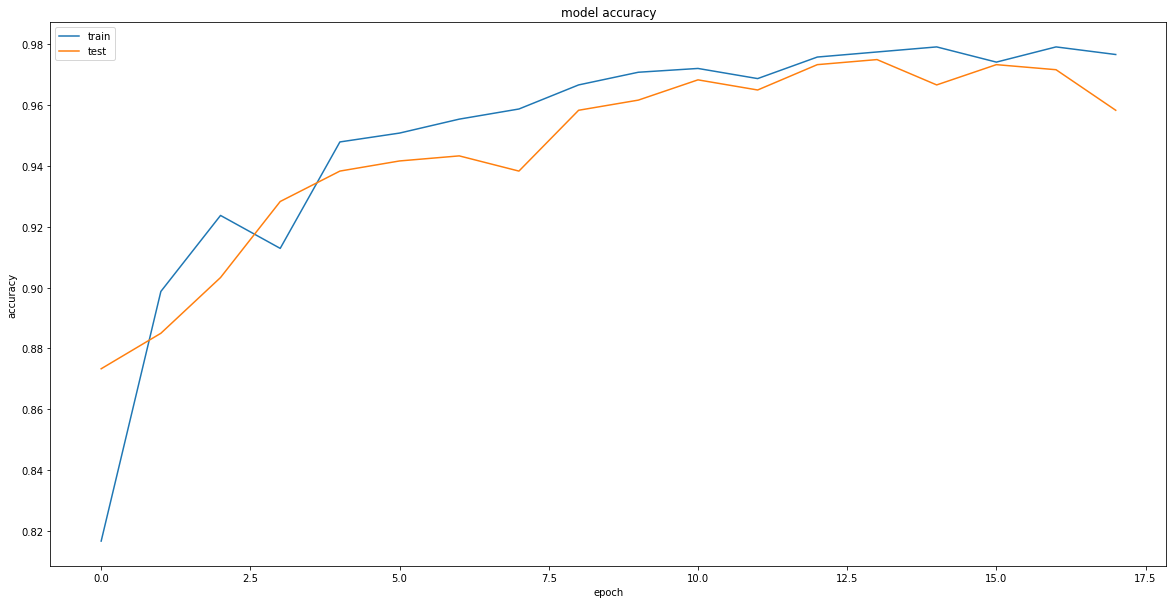

In [22]:
#Plotting the accuracy
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

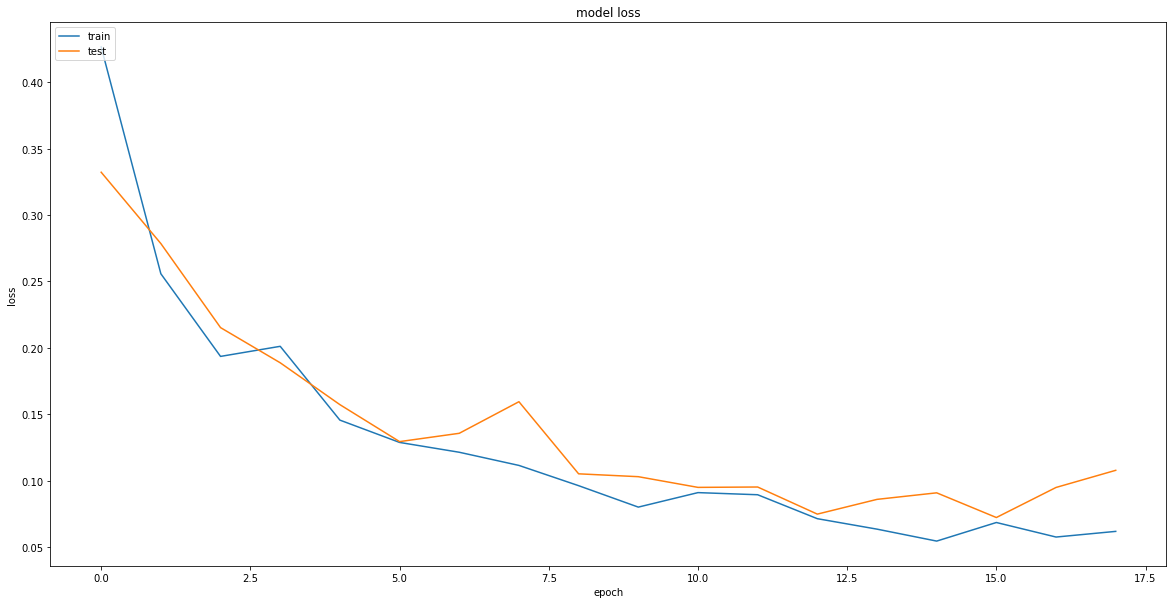

In [23]:
#Plotting loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
#Evaluate on test set
X_test = X_test / 255

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

1000/1000 [==============================] - 2s 2ms/step


In [26]:
print('Test Loss: {}'.format(round(test_loss,3)))
print('Test Accuracy: {}%' .format(round(test_accuracy*100,3)))

Test Loss: 0.057
Test Accuracy: 98.0%


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
#Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1)

confusion_mtx = confusion_matrix(y_test[:,1], y_pred_classes)

confusion_mtx

array([[743,   9],
       [ 11, 237]], dtype=int64)

## Finding ships in picture

In [29]:
#Load the large satellite image
img = Image.open('D:/MSU/Material/Fall/ML and Optimization/Project/scenes/scenes/lb_4.png')
#img = img.convert(mode="RGB")
pic1 = img.load()

rgb = 3
width = img.size[0]
height = img.size[1]

In [30]:
#Height and width of image
print(height)
print(width)

1477
2625


In [31]:
#Create a vector for the picture
pic_vector = []

for z in range(rgb):
    for y in range(height):
        for x in range(width):
            pic_vector.append(pic1[x,y][z])

In [32]:
pic_vector = np.array(pic_vector).astype('uint8')
pic_tensor = pic_vector.reshape([rgb, height, width]).transpose(1, 2, 0)

In [33]:
pic_tensor.shape

(1477, 2625, 3)

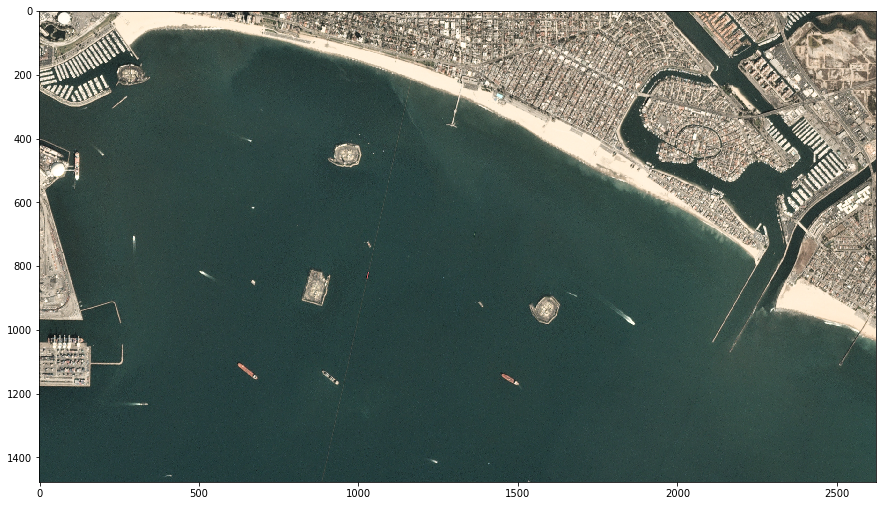

In [34]:
#Plot the figure
plt.figure(figsize = (15, 20))
plt.imshow(pic_tensor)
plt.show()

In [133]:
pic_tensor = pic_tensor.transpose(2,0,1)
pic_tensor.shape

(3, 1477, 2625)

In [134]:
#Slice the main image for prediction
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = pic_tensor[0][y+i][x+j]
            area_study[1][i][j] = pic_tensor[1][y+i][x+j]
            area_study[2][i][j] = pic_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    #sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [135]:
#Ensure the coordinates are not for an already predicted ship
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [136]:
#Step size for traversing the larger image
step = 10
coordinates = []

for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step)):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            #print(result)
            #plt.imshow(area[0])
            #plt.show()

In [137]:
#Plotting ships on image
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                pic_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                pic_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                pic_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                pic_tensor[ch][y+th+80][x+i] = -1

In [138]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [139]:
pic_tensor = pic_tensor.transpose(1,2,0)
pic_tensor.shape

(1477, 2625, 3)

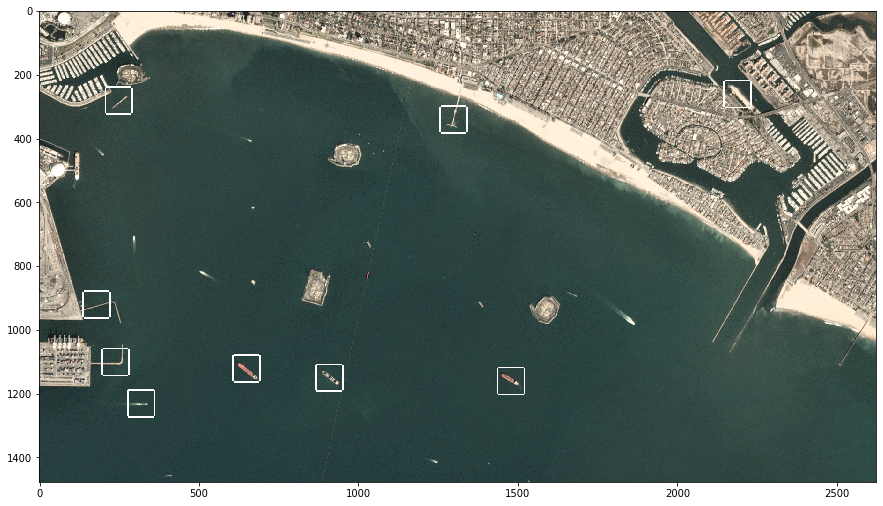

In [140]:
plt.figure(figsize = (15,30))

plt.subplot(3,1,1)
plt.imshow(pic_tensor)

plt.show()